In [78]:
# Import Dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar

Populating the interactive namespace from numpy and matplotlib


In [79]:
# Import & Read CSV generated from DarkSky Weather API
Pitts = "Ste_Crime_severity_Output.csv"
Ste_Crime_severity_Output_df = pd.read_csv(Pitts)
Ste_Crime_severity_Output_df.head(2)

,Unnamed: 0,Age,Gender,Race,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0,24.0,F,B,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,1,31.0,M,W,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1


In [80]:
del Ste_Crime_severity_Output_df['Unnamed: 0']
Ste_Crime_severity_Output_df.head(2)

,Age,Gender,Race,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,24.0,F,B,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,31.0,M,W,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1


In [81]:
#Ste_Crime_severity_Output_df.describe()

In [82]:
new_crime_df = Ste_Crime_severity_Output_df[(Ste_Crime_severity_Output_df.Age > 0) & 
                                            (Ste_Crime_severity_Output_df.Age <= 100)]

In [83]:
#new_crime_df.describe()

In [84]:
# Weather vs Crime Frequency / Crime Type
    # Temperature (Hot vs Cold)
        # X-Axis: Temperature (Ex. Very Cold, Cold, Moderate, Hot, Very Hot, etc.)
        # Y-Axis: Amount of Crime (measured by incident number)
    # Weather Condition: 
        # X-Axis: Type of weather (ie rain, sun, snow, etc.)
        # Y-Axis: Amount of Crime (measured by incident number)


In [85]:
# Crime Frequency vs Incident Location (Heatmap) (Liam)
    # Crime Frequency vs Police Zone (Heatmap) (Liam)


In [86]:
# Crime Severity vs Incident Location (Heatmap) (Liam)


In [87]:
# Age, Gender and Race vs Crime (Pie Charts?)
    # Crime Frequency
        # Grouped by incident location & date
    # Crime Type
    # Crime Severity (Felonies, Misdemeanors or Violations/Infractions)

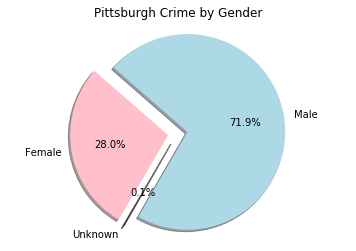

In [88]:
gender_count = new_crime_df["Gender"].value_counts()
total_gender_count = new_crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.show()

In [89]:
new_crime_df["Offenses Severity"].unique()

array(['M', 'F', 'Murder of 1st Degree'], dtype=object)

In [91]:
crime_type_count = new_crime_df["Offenses Severity"].value_counts()
crime_type_count

M                       13099
F                        5376
Murder of 1st Degree        2
Name: Offenses Severity, dtype: int64

In [92]:
total_crime_count = new_crime_df["Offenses Severity"].count()
total_crime_count

18477

In [93]:
crime_percentage = (crime_type_count/total_crime_count) *100
crime_percentage

M                       70.893543
F                       29.095632
Murder of 1st Degree     0.010824
Name: Offenses Severity, dtype: float64

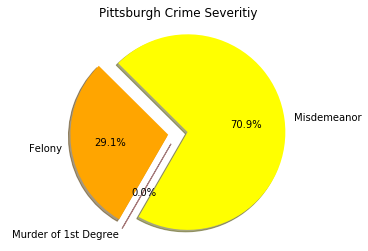

In [155]:
crime_type_count = new_crime_df["Offenses Severity"].value_counts()
total_crime_count = new_crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony", "Murder of 1st Degree"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange", "Red"]
explode = (0.1, 0.1, 0.1)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")

plt.show()

Text(0.5, 1.0, 'Pittsburgh Crime by Race')

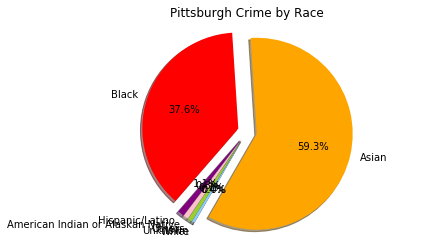

In [95]:
race_count = new_crime_df["Race"].value_counts()
total_race_count = new_crime_df["Race"].count()
race_percentage = (race_count/total_race_count) *100

Race = ["Asian", "Black", "Hispanic/Latino", "American Indian or Alaskan Native", "Others", "Unknown","White"]
Percent = [race_percentage]
colors = ["orange", "red", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(race_percentage, explode=explode, labels=Race, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Race")


In [96]:
#tick_locations = np.arange(len(new_crime_df))
#colors = {"A":'blue', "B":'purple', "H": 'yellow', "I":'skyblue', "O": 'purple', "U":'red',"W": 'gold'}
#plt.bar(tick_locations, new_crime_df['Race'], align="center", color= list(new_crime_df['Offenses Severity'].map(colors)))
#plt.xticks(tick_locations, new_crime_df['title'], rotation=45, ha="right")
#plt.show()

In [97]:
#new_crime_df.groupby(['Race'],['Offenses Severity']).count().unstack().plot.bar()

Text(0.5, 0, 'Race Type')

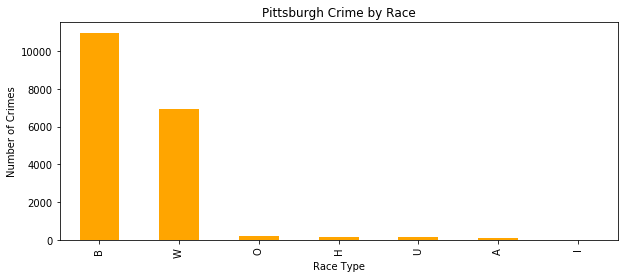

In [98]:
race_data = new_crime_df["Race"].value_counts()
race_data.plot.bar(align="center", figsize=(10,4), color= "orange")
plt.title("Pittsburgh Crime by Race")
plt.ylabel("Number of Crimes")
plt.xlabel("Race Type")

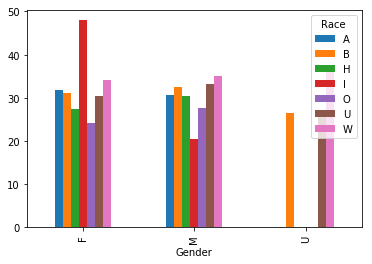

In [99]:
new_crime_df.groupby(['Gender','Race'])['Age'].mean().unstack().plot.bar()

In [100]:
crime_df = new_crime_df.loc[:,["Age","Race", "Gender", "Offenses Severity", "Arrest Year", 
                               "Arrest Month", "Weather Condition","Temperature"]]
crime_df.head()

,Age,Race,Gender,Offenses Severity,Arrest Year,Arrest Month,Weather Condition,Temperature
0,24.0,B,F,M,2016,February,Mostly Cloudy,20.53
1,31.0,W,M,M,2016,February,Overcast,32.76
2,22.0,W,M,F,2016,April,Light Rain,50.96
3,36.0,W,M,M,2016,April,Overcast,39.39
4,60.0,W,M,M,2016,April,Overcast,32.63


In [101]:
#Establish bins for ages
bins = [18,25,30,35,40,45,50,55,60,65,70,80,90,100]
group_labels = ["<18","18-25","25-30","30-35","35-40","40-45","45-50","50-55", "55-60","60-65","65-70", "70-80", ">80"]

In [102]:
pd.cut(crime_df["Age"], bins, labels = group_labels).head(10)

0      <18
1    25-30
2      <18
3    30-35
4    50-55
5    45-50
6      <18
7    18-25
8    18-25
9    25-30
Name: Age, dtype: category
Categories (13, object): [<18 < 18-25 < 25-30 < 30-35 ... 60-65 < 65-70 < 70-80 < >80]

In [103]:
crime_df["Age_group"] = pd.cut(crime_df["Age"], bins, labels = group_labels) 
crime_df.head()

,Age,Race,Gender,Offenses Severity,Arrest Year,Arrest Month,Weather Condition,Temperature,Age_group
0,24.0,B,F,M,2016,February,Mostly Cloudy,20.53,<18
1,31.0,W,M,M,2016,February,Overcast,32.76,25-30
2,22.0,W,M,F,2016,April,Light Rain,50.96,<18
3,36.0,W,M,M,2016,April,Overcast,39.39,30-35
4,60.0,W,M,M,2016,April,Overcast,32.63,50-55


In [26]:
#Age_group_df=crime_df.groupby("Age_group").count()
#Age_group_df

In [40]:
crime_type_count = crime_df["Offenses Severity"].value_counts()
avg_temp= crime_df.groupby(["Temperature"]).mean()
#plt.scatter(crime_type_count, avg_temp, color = "b", alpha = .80, marker = "o", edgecolor = "black")
#plt.title("City Temperature Vs Offenses Severity") 
#plt.xlabel("Average Temperature (°F)")
#plt.ylabel("Crime Severity")
#plt.grid(True)

In [28]:
#PH# Crime Frequency vs Time of Year (seasonality)
#crime_plot = full_crime_df.groupby(["Arrest Year","Arrest Month"]).count().stack().plot.bar()
#crime_plot.set_xlabel('Arrest Year')
#crime_plot.set_ylabel('OFFENSES')
#crime_plot.set_title('crime vs time of year')

In [104]:
crime_df1 = new_crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]
crime_df1.head()

,Offenses Severity,Arrest Year,Arrest Month
0,M,2016,February
1,M,2016,February
2,F,2016,April
3,M,2016,April
4,M,2016,April


In [129]:
df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2
#df2[['off','mth']].plot(kind='bar', stacked=True)
#df2[["offenses","Month"]].plot(kind='bar', stacked=True)


Arrest Month,April,August,December,February,January,July,June,March,May,November,October,September
Offenses Severity,,,,,,,,,,,,
F,327.0,535.0,480.0,359.0,433.0,401.0,344.0,416.0,418.0,475.0,595.0,593.0
M,964.0,1272.0,1194.0,847.0,863.0,995.0,1010.0,899.0,1085.0,1279.0,1339.0,1352.0
Murder of 1st Degree,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2

Arrest Month,April,August,December,February,January,July,June,March,May,November,October,September
Offenses Severity,,,,,,,,,,,,
F,327.0,535.0,480.0,359.0,433.0,401.0,344.0,416.0,418.0,475.0,595.0,593.0
M,964.0,1272.0,1194.0,847.0,863.0,995.0,1010.0,899.0,1085.0,1279.0,1339.0,1352.0
Murder of 1st Degree,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df2 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)
df2

Arrest Year,2016,2017,2018
Offenses Severity,,,
F,882.0,2462.0,2032.0
M,1949.0,5812.0,5338.0
Murder of 1st Degree,0.0,0.0,2.0


In [150]:
Yr_group = crime_df.groupby(["Arrest Year","Arrest Month"]).count()

del Yr_group['Age']
del Yr_group['Race']
del Yr_group['Gender']
del Yr_group['Weather Condition']
del Yr_group['Temperature']
del Yr_group['Age_group']
Yr_group.head()

Offenses Severity
Arrest Year Arrest Month                   
2016        April                        10
            August                      461
            December                    574
            February                      2
            July                         10

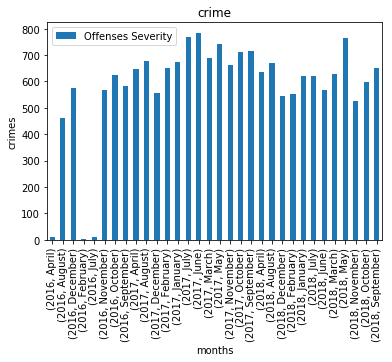

<Figure size 432x288 with 0 Axes>

In [153]:
month_chart = Yr_group.plot(kind="bar", title="crime")
month_chart.set_xlabel("months")
month_chart.set_ylabel("crimes")

plt.show()
plt.tight_layout()

In [34]:
Arrest_Yr_group = crime_df.groupby(["Arrest Year","Arrest Month"]).count()
Arrest_Yr_group.head()

Age  Race  Gender  Offenses Severity  \
Arrest Year Arrest Month                                         
2016        April          10    10      10                 10   
            August        461   461     461                461   
            December      574   574     574                574   
            February        2     2       2                  2   
            July           10    10      10                 10   

                          Weather Condition  Temperature  Age_group  
Arrest Year Arrest Month                                             
2016        April                        10           10         10  
            August                      461          461        435  
            December                    574          574        492  
            February                      2            2          2  
            July                         10           10         10

In [ ]:
#PH# Crime Frequency vs Time of Year (seasonality)

# Split data into groups based upon day of week
#month_groups = organized_df.groupby('Arrest Month').sum()

#sorter2 = ['January', 'Febraury', 'March', 'April', 'May', 'June', 
#          'July', 'August', 'September', 'October', 'November', 'December']
#sorterIndex = dict(zip(sorter2,range(len(sorter2))))

#month_groups['Month_id'] = month_groups.index
#month_groups['Month_id'] = month_groups['Month_id'].map(sorterIndex)
#month_groups.sort_values('Month_id', inplace=True)

#fig, ax = plt.subplots(facecolor='white')
 
#ax.bar(month_groups.Month_id, month_groups.Criminal)
#ax.set_xticks(month_groups.Month_id)
#ax.set_xticklabels(month_groups.index)

# Edit
    # Change Colors
    # Make Labels Diagonal
    # Change Y-Axis meaurements

In [ ]:
#Time_df = full_crime_df.loc[:,["Arrest Year","Arrest Month"]]
#Arrest_Year_group = Time_df.groupby(["Arrest Year","Arrest Month"]).count()


In [ ]:
# Crime Severity vs Time of Year (seasonality)
#Arrest month vs len(grouped(Incident Severity))
# X-Axis: Months
# Y-Axis: Severity of Crime (measured by incident number)


In [ ]:
#PH# Crime Frequency vs Day of Week

# Split data into groups based upon day of week
#day_groups = organized_df.groupby('Arrest Day of Week').sum()

#sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#sorterIndex = dict(zip(sorter,range(len(sorter))))

#day_groups['Day_id'] = day_groups.index
#day_groups['Day_id'] = day_groups['Day_id'].map(sorterIndex)
#day_groups.sort_values('Day_id', inplace=True)

#fig, ax = plt.subplots(facecolor='white')
 
#ax.bar(day_groups.Day_id, day_groups.Criminal)
#ax.set_xticks(day_groups.Day_id)
#ax.set_xticklabels(day_groups.index)


In [ ]:
# Crime Severity vs Day of Week
#Arrest Day of Week vs len(grouped(Incident Severity))
# X-Axis: Day (Monday, Tuesday, Wednesday, etc.)
# Y-Axis: Severity of Crime (measured by incident type)


In [ ]:
#PH# Crime Frequency vs Time of Day 

# Split data into groups based upon day of week
#time_of_day_groups = organized_df.groupby('Arrest Time of Day')
# Find out how many arrests occured during each month group
#incidents_time_of_day = time_of_day_groups['Criminal'].count()
# Chart our data, give it a title, and label the axes
#incidents_time_of_day_chart = incidents_time_of_day.plot(kind="bar", title="Crime Frequency vs. Time of Day")
#incidents_time_of_day_chart.set_xlabel("Time of Day")
#incidents_time_of_day_chart.set_ylabel("Amount of Crime (Per Incident)")
#plt.xticks(rotation = 45)


#plt.tight_layout()

# Edit
# Change Colors
# Make Labels Diagonal
# Change Y-Axis meaurements

In [ ]:
# Crime Severity vs Time of Day 
# X-Axis: Time of Day (early morning, morning, early afternoon, noon, etc.)
# Y-Axis: Severity of Crime (measured by incident type)
